## Random Forest Project
Here,for this project we explore the data of Kyphosis csv file and build a random forest model which helps the detection of Kyphosis.Here,also the result of random forest model is compared with decision tree.

Library/package used:Pandas,NumPy,Matplotlib,seaborn,scikit-           learn,DecisionTreeClassifier,RandomForestClassifier,train_test_split,confusion_matrix,classification_report

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import Dataset

In [4]:
df=pd.read_csv('kyphosis.csv')

In [5]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [6]:
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


### Exploratory data analysis
Here,for data visualization seaborn and matplotlib libraries are used

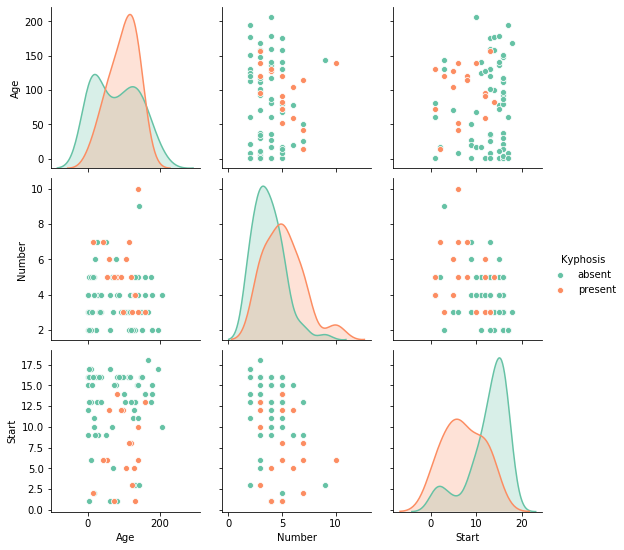

In [13]:
sns.pairplot(df,hue='Kyphosis',palette='Set2')

Text(0.5, 0, 'Age')

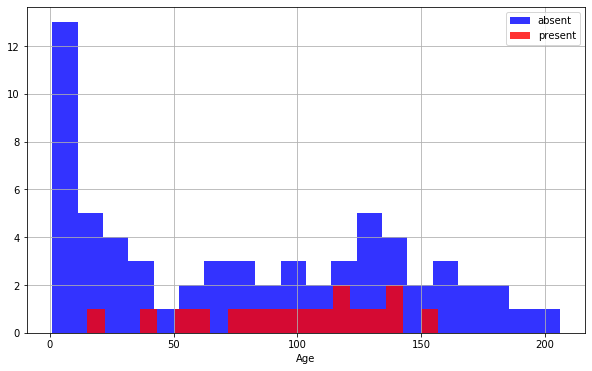

In [20]:
plt.figure(figsize=(10,6))
df[df['Kyphosis']=='absent']['Age'].hist(alpha=0.8,color='blue',
                                              bins=20,label='absent')
df[df['Kyphosis']=='present']['Age'].hist(alpha=0.8,color='red',
                                              bins=20,label='present')
plt.legend()
plt.xlabel('Age')

### Train Test Split

In [22]:
from sklearn.model_selection import train_test_split


In [24]:
x=df.drop('Kyphosis',axis=1)
y=df['Kyphosis']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.35)

### Decision Tree
Now,just start training by a single tree

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
tree=DecisionTreeClassifier()

In [53]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### Prediction and evaluation

In [54]:
prediction=tree.predict(X_test)

In [31]:
from sklearn.metrics import classification_report,confusion_matrix

In [57]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

      absent       0.71      0.80      0.75        15
     present       0.25      0.17      0.20         6

    accuracy                           0.62        21
   macro avg       0.48      0.48      0.48        21
weighted avg       0.58      0.62      0.59        21



In [60]:
print(confusion_matrix(y_test,prediction))

[[12  3]
 [ 5  1]]


### Random Forest

In [73]:
from sklearn.ensemble import RandomForestClassifier
r = RandomForestClassifier(n_estimators=90)
r.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=90,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [74]:
r_pred=r.predict(X_test)

In [75]:
print(classification_report(y_test,r_pred))

              precision    recall  f1-score   support

      absent       0.72      0.87      0.79        15
     present       0.33      0.17      0.22         6

    accuracy                           0.67        21
   macro avg       0.53      0.52      0.51        21
weighted avg       0.61      0.67      0.63        21



In [76]:
print(confusion_matrix(y_test,r_pred))

[[13  2]
 [ 5  1]]


Note:Here,we observe that random forest predict the kyphosis with better precision.